In [1]:
import pynini
from pynini.lib import rewrite
from pynini.lib import pynutil
import string
from pynini.lib.rewrite import rewrites, top_rewrites

In [3]:
bruh = pynini.Fst()

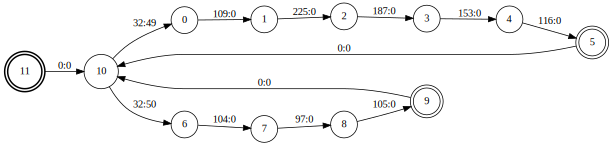

In [26]:
bruh = pynini.Fst()
bruh |= pynini.cross('một', '1')
bruh |= pynini.cross('hai', '2')
bruh.rmepsilon()
bruh.closure()

In [36]:
pynini.project(bruh)
tattice = pynini.compose('một', bruh)

FstArgError: Unknown projection type: 'một'

In [29]:
rewrite.top_rewrite('một một hai', bruh)

Error: Composition failure

In [26]:
lattice.string()

FstOpError: Operation failed

In [2]:
from nemo_text_processing.inverse_text_normalization.inverse_normalize import InverseNormalizer

FstIOError: Read failed

In [129]:
smt = InverseNormalizer()

In [130]:
smt.inverse_normalize('', verbose=True)

tokens { cardinal { negative: "-" integer: "1000300" } }


'-1000300'

In [131]:
from pynini.lib import pynutil

In [46]:
pynutil.add_weight(pynutil.insert("username: \""), 20)

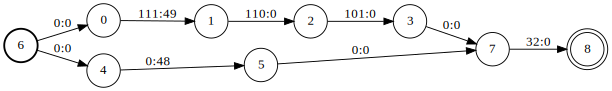

In [34]:
pynini.union(pynini.cross('one', '1'), pynutil.insert("0"),) + pynutil.delete(' ')

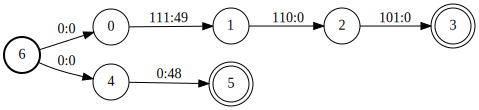

In [33]:
pynini.cross('one', '1') | pynutil.insert("0")

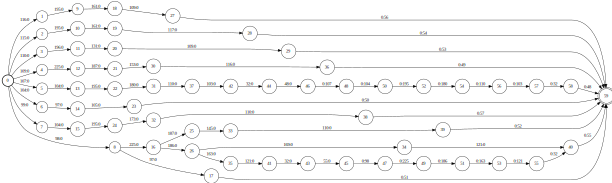

In [24]:
pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/digit.tsv").optimize()

In [50]:
bro = pynini.cross('abcd', '1234') @ pynini.accep('1234')

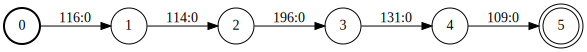

In [52]:
pynini.cross("trăm", "")

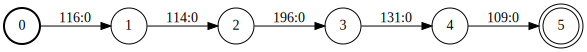

In [53]:
pynutil.delete("trăm")

In [54]:
graph_ten = pynini.cross('mười', '1') + pynini.union(graph_digit_any, pynini.insert('0'))

NameError: name 'graph_digit_any' is not defined

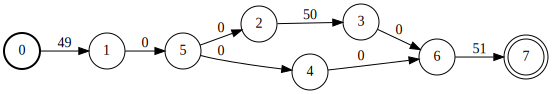

In [58]:
pynini.cross('1', '1') + pynini.union(pynini.cross('2', '2'), pynini.cross('', '')) + pynini.cross('3', '3')

In [134]:
rewrites('1', pynini.closure(pynini.cross('1', '1'), 0, 1))

['1']

In [182]:
rewrites("12", pynini.union(pynini.cross('1', '0'), pynini.cross("", "")) + pynini.cross("2", "1"))

['01']

In [66]:
import sys
print(sys.path)

['/home/viet/wfst', '/home/viet/.vscode/extensions/ms-toolsai.jupyter-2021.6.999662501/pythonFiles', '/home/viet/.vscode/extensions/ms-toolsai.jupyter-2021.6.999662501/pythonFiles/lib/python', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python39.zip', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python3.9', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python3.9/lib-dynload', '', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python3.9/site-packages', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python3.9/site-packages/IPython/extensions', '/home/viet/.ipython']


In [99]:
from pynini.lib.rewrite import rewrites

In [225]:
NEMO_DIGIT = pynini.union(*string.digits).optimize()
delete_space = pynutil.delete(" ")
graph_digit = pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/digit.tsv")
graph_digit_var = pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/digit_var.tsv")
graph_digit_any = graph_digit | graph_digit_var
graph_digit_non_zero = graph_digit @ pynini.difference(pynini.union(*string.digits).optimize(), '0')
graph_digit_any_non_zero = graph_digit_any @ pynini.difference(pynini.union(*string.digits).optimize(), '0')

graph_ten = pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/ten.tsv") + pynini.union(delete_space + graph_digit_any, pynutil.insert("0"))

graph_hundred = pynutil.delete("trăm")

graph_2_9_muoi = graph_digit_non_zero + delete_space + pynini.union(
    pynutil.delete("mươi") + pynini.union(delete_space + graph_digit_any, pynutil.insert("0")),
    graph_digit_any_non_zero)

graph_hundred_component = pynini.union(
    graph_digit + delete_space + graph_hundred, pynutil.insert("0")
    )
# graph_hundred_component += pynini.union(
#     pynini.closure(delete_space, 0, 1)
#     + pynini.union(graph_ten, graph_2_9_muoi), pynutil.insert("00")
#     )
graph_hundred_component += pynini.closure(delete_space, 0, 1) 
graph_hundred_component += pynini.union(
    graph_ten | graph_2_9_muoi,
    pynini.union(pynutil.delete("linh"), pynutil.delete("lẻ")) + pynutil.insert("0") + delete_space + graph_digit_any | pynutil.insert("00")
)
graph_hundred_component = pynini.union(graph_hundred_component, pynutil.insert("00") + graph_digit)

graph_hundred_component_at_least_one_none_zero_digit = graph_hundred_component @ (
    pynini.closure(NEMO_DIGIT) + (NEMO_DIGIT - "0") + pynini.closure(NEMO_DIGIT)
)

graph_thousands = pynini.union(
    graph_hundred_component + delete_space + pynutil.delete("nghìn"),
    pynutil.insert("000", weight=0.1),
)

graph_million = pynini.union(
    graph_hundred_component + delete_space + pynutil.delete("triệu"),
    pynutil.insert("000", weight=0.1),
)
graph_billion = pynini.union(
    graph_hundred_component + delete_space + pynini.union(pynutil.delete("tỉ"), pynutil.delete("tỷ")),
    pynutil.insert("000", weight=0.1),
)

graph = pynini.union(
    # graph_sextillion
    # + delete_space
    # + graph_quintillion
    # + delete_space
    # + graph_quadrillion
    # + delete_space
    # + graph_trillion
    # + delete_space
    # graph_billion
    # + delete_space
    graph_million
    + pynini.union(delete_space, pynini.cross("", ""))
    + graph_thousands
    + pynini.union(delete_space, pynini.cross("", ""))
    + graph_hundred_component,
)

In [226]:
rewrites("hai trăm linh nhăm triệu chín trăm mười lăm nghìn hai trăm bốn hai", graph)

['205915242']

In [227]:
rewrites("không triệu", graph)

['000000000']

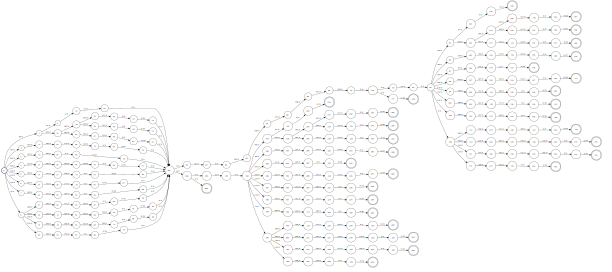

In [71]:
graph_2_9_muoi

In [67]:
rewrites("bốn mươi lăm", graph_2_9_muoi)

['45']

In [298]:
NEMO_DIGIT = pynini.union(*string.digits).optimize()
delete_space = pynutil.delete(" ")
graph_digit = pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/digit.tsv")
graph_digit_var = pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/digit_var.tsv")
graph_digit_any = graph_digit | graph_digit_var
graph_digit_non_zero = graph_digit @ pynini.difference(pynini.union(*string.digits).optimize(), '0')
graph_digit_any_non_zero = graph_digit_any @ pynini.difference(pynini.union(*string.digits).optimize(), '0')

graph_hundred_end = pynutil.delete("trăm")
graph_thousands_end = pynutil.delete("nghìn")
graph_million_end = pynutil.delete("triệu")
graph_billion_end = pynini.union(pynutil.delete("tỉ"), pynutil.delete("tỷ"))

graph_ten = pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/ten.tsv") + pynini.union(delete_space + graph_digit_any, pynutil.insert("0"))

graph_2_9_muoi = graph_digit_non_zero + delete_space + pynini.union(
    pynutil.delete("mươi") + pynini.union(delete_space + graph_digit_any, pynutil.insert("0")),
    graph_digit_any_non_zero)

graph_hundred_component = pynini.union(graph_digit + delete_space + graph_hundred_end, pynutil.insert("0"))
graph_hundred_component += pynini.closure(delete_space, 0, 1) 
graph_hundred_component += pynini.union(
    graph_ten | graph_2_9_muoi,
    pynini.union(pynutil.delete("linh"), 
    pynutil.delete("lẻ")) + pynutil.insert("0") + delete_space + graph_digit_any | pynutil.insert("00"))
graph_hundred_component = pynini.union(graph_hundred_component, pynutil.insert("00") + graph_digit)

graph_hundred_component_at_least_one_none_zero_digit = graph_hundred_component @ (
    pynini.closure(NEMO_DIGIT) + (NEMO_DIGIT - "0") + pynini.closure(NEMO_DIGIT)
)


graph_thousands = pynini.union(
    graph_hundred_component + delete_space + graph_thousands_end,
    pynutil.insert("000", weight=0.1),
)

graph_million = pynini.union(
    graph_hundred_component + delete_space + graph_million_end,
    pynutil.insert("000", weight=0.1),
)

graph_billion = pynini.union(
    graph_hundred_component + delete_space + graph_billion_end,
    pynutil.insert("000", weight=0.1),
)

graph = pynini.union(
    # graph_sextillion
    # + delete_space
    # + graph_quintillion
    # + delete_space
    # + graph_quadrillion
    # + delete_space
    # + graph_trillion
    # + delete_space
    # graph_billion
    # + delete_space
    graph_million
    + pynini.union(delete_space, pynini.cross("", ""))
    + graph_thousands
    + pynini.union(delete_space, pynini.cross("", ""))
    + graph_hundred_component,
)

graph = graph @ pynini.union(
    pynutil.delete(pynini.closure("0")) + pynini.difference(NEMO_DIGIT, "0") + pynini.closure(NEMO_DIGIT), pynutil.delete(pynini.closure("0")) + pynutil.insert("0")
)

# labels_exception = ["không", "một", "hai", "ba", "bốn", "năm", "sáu", "bảy", "bẩy", "tám", "chín"]

# graph_exception = pynini.union(*labels_exception)
# graph = (pynini.project(graph, "input") - graph_exception.arcsort()) @ graph

optional_minus_graph = pynini.closure(
    pynutil.insert("negative: ") + pynini.union(pynini.cross("âm", "\"-\""), pynini.cross("trừ", "\"-\"")) + " ", 0, 1
)

graph = optional_minus_graph + pynutil.insert("integer: \"") + graph + pynutil.insert("\"")
labels_exception = ["không", "một", "hai", "ba", "bốn", "năm", "sáu", "bảy", "bẩy", "tám", "chín"]

graph_exception = pynini.union(*labels_exception)
graph = (pynini.project(graph, "input") - graph_exception.arcsort()) @ graph

In [301]:
rewrites("âm bốn", graph)

['negative: "-" integer: "4"']

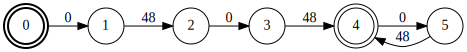

In [263]:
pynini.difference(pynini.closure("0"), "0")

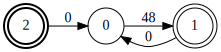

In [264]:
pynini.closure("0")

In [305]:
print("bruh" + u"\u00A0" + "bruh")

bruh bruh


In [8]:
from nemo_text_processing.inverse_text_normalization.inverse_normalize import InverseNormalizer

In [12]:
InverseNormalizer().inverse_normalize("one", verbose=True)

FstOpError: Operation failed